In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train.csv')

In [3]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [6]:
from datetime import datetime
dateparse=lambda dates: datetime.strptime(dates,'%d-%m-%Y %H:%M')
print(type(dateparse))
data=pd.read_csv('train.csv',parse_dates=[1],index_col='Datetime',date_parser=dateparse)
print(data.head())

<class 'function'>
                     ID  Count
Datetime                      
2012-08-25 00:00:00   0      8
2012-08-25 01:00:00   1      2
2012-08-25 02:00:00   2      6
2012-08-25 03:00:00   3      2
2012-08-25 04:00:00   4      2


In [7]:
print(data.dtypes)

ID       int64
Count    int64
dtype: object


In [8]:
ts = data['Count']
ts.head(10)

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
Name: Count, dtype: int64

In [9]:
ts['2012-08-25']

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
2012-08-25 10:00:00    2
2012-08-25 11:00:00    6
2012-08-25 12:00:00    4
2012-08-25 13:00:00    2
2012-08-25 14:00:00    6
2012-08-25 15:00:00    2
2012-08-25 16:00:00    2
2012-08-25 17:00:00    2
2012-08-25 18:00:00    2
2012-08-25 19:00:00    2
2012-08-25 20:00:00    2
2012-08-25 21:00:00    6
2012-08-25 22:00:00    2
2012-08-25 23:00:00    2
Name: Count, dtype: int64

In [10]:
ts['2012-08-25':'2012-08-26']

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
2012-08-25 10:00:00    2
2012-08-25 11:00:00    6
2012-08-25 12:00:00    4
2012-08-25 13:00:00    2
2012-08-25 14:00:00    6
2012-08-25 15:00:00    2
2012-08-25 16:00:00    2
2012-08-25 17:00:00    2
2012-08-25 18:00:00    2
2012-08-25 19:00:00    2
2012-08-25 20:00:00    2
2012-08-25 21:00:00    6
2012-08-25 22:00:00    2
2012-08-25 23:00:00    2
2012-08-26 00:00:00    4
2012-08-26 01:00:00    6
2012-08-26 02:00:00    2
2012-08-26 03:00:00    4
2012-08-26 04:00:00    2
2012-08-26 05:00:00    2
2012-08-26 06:00:00    2
2012-08-26 07:00:00    2
2012-08-26 08:00:00    2
2012-08-26 09:00:00    4
2012-08-26 10:00:00    2
2012-08-26 11:00:00    2
2012-08-26 12:00:00    8
2012-08-26 13:00:00    6
2012-08-26 14:00:00    6
2012-08-26 15:00

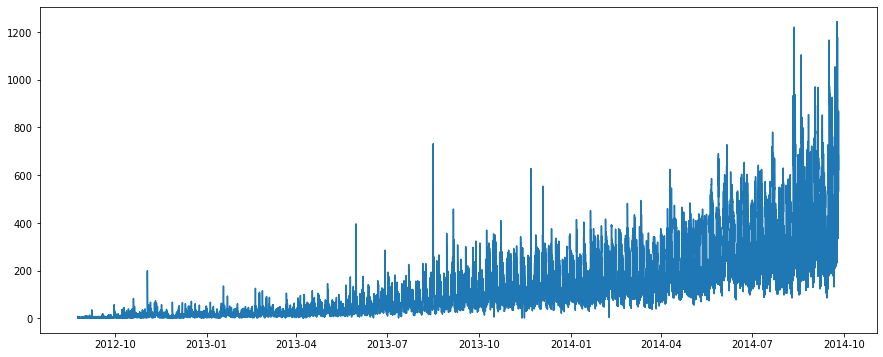

In [14]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib.pyplot as plt
plt.plot(ts)

<h4>Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
<h4>Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

In [23]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

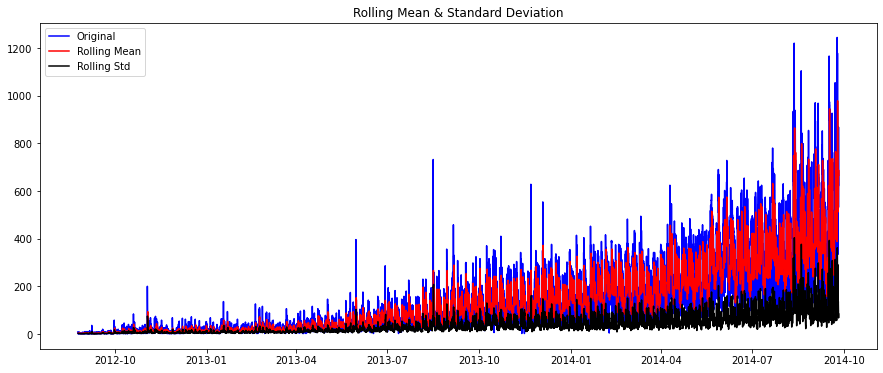

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [24]:
test_stationarity(ts)

<h3>from above dickyfuller test we observe test statistic value is smaller that critical value so we can reject the null hypothesis(i.e data is not stationary) and accept the alternate hypothesis(i.e data is stationary)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(ts, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts)**2))